In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("src/")

import nanonets

In [2]:
amplitude       = 0.1
step_size       = 1e-10
steps_in_sweep  = 100
n_sweeps        = 1
signal          = [np.linspace(-1*amplitude, amplitude, steps_in_sweep//2, endpoint=False) if (i % 2 == 0) else np.linspace(amplitude, -1*amplitude, steps_in_sweep//2, endpoint=False) for i in range(n_sweeps)]
signal          = [x for xs in signal for x in xs]
voltages        = np.zeros(shape=(n_sweeps*steps_in_sweep//2,9))
voltages[:,0]   = signal
time            = step_size*np.arange(n_sweeps*steps_in_sweep//2)

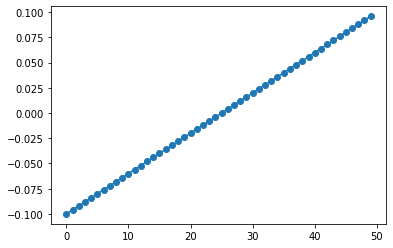

In [3]:
plt.plot(voltages[:,0],'o-')

In [12]:
results = {}
N       = 3

for target_electrode in [1,2,6,7]:

    sim_info    = {
        "error_th"          : 0.05,      
        "max_jumps"         : 10000000,
        "eq_steps"          : 10000,
        "jumps_per_batch"   : 1000,
        "kmc_counting"      : False,
        "min_batches"       : 10
    }

    topology = {
        "Nx"    : N,
        "Ny"    : N,
        "Nz"    : 1,
        "e_pos" :  [[0,0,0],[int((N-1)/2),0,0],[N-1,0,0],[0,int((N-1)/2),0],[0,N-1,0],[int((N-1)/2),N-1,0],[N-1,int((N-1)/2),0],[N-1,N-1,0]]
    }

    sim_class = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=target_electrode, output_potential=True, sim_dic=sim_info, save_th=0.1)
    results[target_electrode] = sim_class.return_output_values()

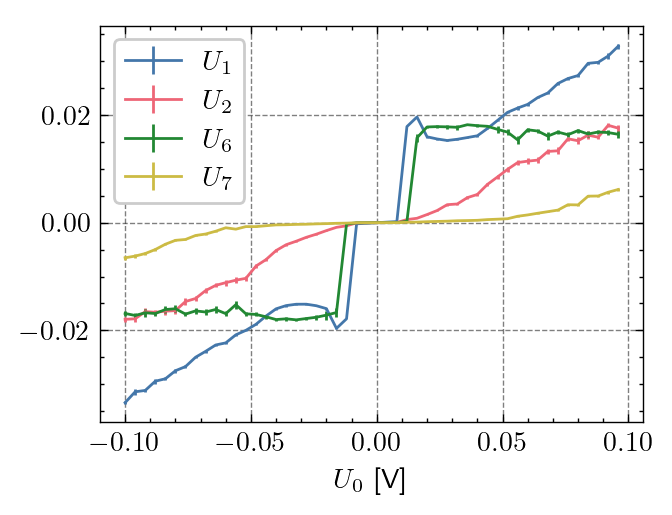

In [14]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for key,result in results.items():
        ax.errorbar(voltages[:,0], result[:,2], result[:,3], label=f'$U_{key}$')
    
    ax.legend()
    ax.set_xlabel("$U_0$ [V]")